In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
#Upload CSV to session storage
books_sample = pd.read_csv('books_data.csv')

In [ ]:
books_sample

,Unnamed: 0,Author,Text
0,0,a,"an invitation from Hartfield , and who were fe..."
1,1,a,materially changed since we talked on this sub...
2,2,a,", gentlemanlike man , whose frequent visits we..."
3,3,a,"me , whenever I had an opportunity , to thank ..."
4,4,a,such unfortunate circumstances do sometimes oc...
...,...,...,...
995,995,e,"sleeps his meadow , and there sleep his cattle..."
996,996,e,the stump ; leaning on a shivered lance ; prop...
997,997,e,"d ' ye see ; now as you well know , sir , we c..."
998,998,e,there again ! there she breaches ! right ahead...


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from collections import defaultdict
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Remove blank rows if any.
books_sample["Text"].dropna(inplace=True)
#Change all the text to lower case.
books_sample["Text"] = [entry.lower() for entry in books_sample["Text"]]
#Tokenization
books_sample["Text"]= [word_tokenize(entry) for entry in books_sample["Text"]]
#Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(books_sample["Text"]):
  Final_words = []
  word_Lemmatized = WordNetLemmatizer()
  for word, tag in pos_tag(entry):
    if word not in stopwords.words('english') and word.isalpha():
      word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
      Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
  books_sample.loc[index,'text_final'] = str(Final_words)

In [ ]:
x = books_sample["text_final"] 

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = books_sample['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
books_sample['encoded_author']=y

In [ ]:
lemmatiser = WordNetLemmatizer()
#Add a condition to check for digits
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(x)
text = tfidf.transform(x)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(text)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

Total variance explained: 0.02


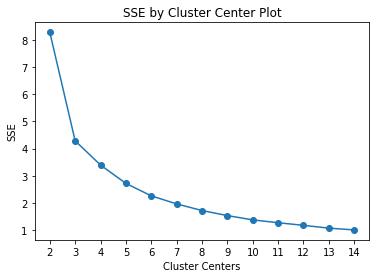

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=20).fit(data).inertia_)
        #print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X_svd, 14)

In [ ]:
from sklearn.metrics import silhouette_score

for i in [2, 3, 4, 5,6,8]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=3, max_iter=12, random_state=25)
    km.fit(X_svd)
    score = silhouette_score(X_svd, km.labels_, metric='euclidean')
    print(score)
    

0.5593946525034948
0.4871345765106396
0.40500081499628104
0.3869729266059601
0.39605813166297993
0.3672683482623596


In [ ]:
km_clusters = KMeans(n_clusters=5, init='k-means++', n_init=4, max_iter=12, random_state=25).fit_predict(X_svd, y)
books_sample['cluster'] = km_clusters

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y, km_clusters)

0.37749999999999995

In [ ]:
pca = PCA(n_components=2).fit_transform(text.todense())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
km_clusters2 = KMeans(n_clusters=5, init='k-means++', n_init=4, max_iter=12, random_state=25).fit_predict(pca, y)


In [ ]:
km_clusters2

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 4, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 1, 0, 4, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
cohen_kappa_score(y, km_clusters2)

0.15874999999999995

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, km_clusters, tfidf.get_feature_names(), 20)


Cluster 0
way,elton,like,great,miss,time,alice,weston,know,good,harriet,look,thing,come,think,make,emma,little,say,mr

Cluster 1
night,away,er,hear,mother,little,tiger,like,flower,cloud,rise,love,sleep,smile,sweet,joy,weep,thou,thee,thy

Cluster 2
day,captain,hand,make,ye,great,boat,ahab,head,say,sea,look,time,old,ship,like,come,man,little,whale

Cluster 3
like,miss,king,dormouse,march,tell,gryphon,come,little,mock,thing,quite,turtle,hatter,look,know,think,mr,alice,say

Cluster 4
day,tom,weep,hear,white,sorrow,fir,father,like,church,green,mother,night,thou,boy,come,love,tree,child,little


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


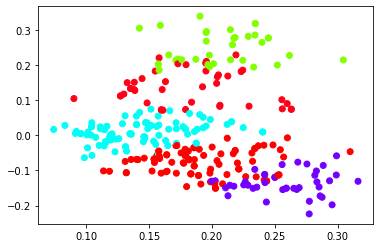

In [ ]:
def plot_scatter(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000)
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(data[max_items,:].todense())    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    plt.scatter(svd[idx, 0], svd[idx, 1], c=label_subset)
    plt.show()

plot_scatter(text, km_clusters)

In [ ]:
c=0
for i in range(0,999):
  if(books_sample['cluster'][i]!=books_sample['encoded_author'][i]):
    c+=1
print(c)

497
